In [59]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
pgf_with_rc_fonts = {
    "text.usetex": True,
    "text.latex.unicode": True,
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
    "pgf.preamble": [
        r'\usepackage{amsmath}',
        r'\usepackage{gensymb}',
        r'\usepackage{siunitx}',
        r'\DeclareSIUnit{\revolution}{rev}',
    ]
}
matplotlib.rcParams.update(pgf_with_rc_fonts)

import matplotlib.pyplot as plt

import pandas as pd

# Background Color
bg = '#d3e9f8'

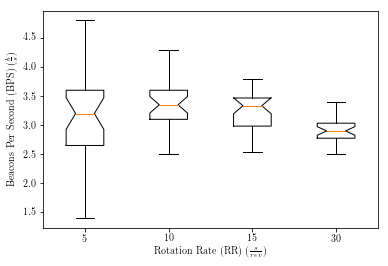

In [98]:
dataframes = []    
directory = '../../valid/discovery/discovery1/discovery-duration/'

# Walk through each subdirectory of working directory
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith("-results.csv"):
            dataframes.append(pd.read_csv(os.path.join(root,file),sep=','))

df = pd.concat(dataframes, axis=0)

data =(df.groupby(['test', 'pass'])['hop-rate'].count()/df.groupby(['test', 'pass'])['duration'].max()).unstack()

fig = plt.figure()
ax = plt.subplot(111)

labels = pd.unique(df.duration.sort_values())

ax.boxplot(data, 1, labels=labels)
plt.xlabel(r'Rotation Rate (RR) ($\frac{s}{rev}$)')
plt.ylabel(r'Beacons Per Second (BPS) ($\frac{b}{s}$)')
fig.savefig('rr1a.pgf')

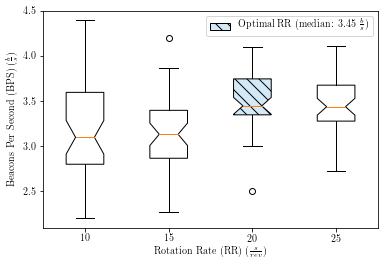

In [100]:
import matplotlib.patches as mpatches

dataframes = []    
directory = '../../valid/discovery/discovery2/discovery-duration/'

# Walk through each subdirectory of working directory
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith("-results.csv"):
            dataframes.append(pd.read_csv(os.path.join(root,file),sep=','))

df = pd.concat(dataframes, axis=0)

data =(df.groupby(['test', 'pass'])['hop-rate'].count()/df.groupby(['test', 'pass'])['duration'].max())

fig = plt.figure()
ax = plt.subplot(111)

labels = pd.unique(df.duration.sort_values())

bp = ax.boxplot(data.unstack(), 1, labels=labels, patch_artist=True)

for box in bp['boxes']:
    box.set_facecolor('None')

opt = bp['boxes'][2]
opt.set_hatch(r'\\')
opt.set_facecolor(bg)
label = f"Optimal RR (median: {data['discovery-duration-20'].median()} "
opt.set_label(label + r"$\frac{b}{s}$)")
plt.legend(handles=[opt])

plt.xlabel(r'Rotation Rate (RR) ($\frac{s}{rev}$)')
plt.ylabel(r'Beacons Per Second (BPS) ($\frac{b}{s}$)')
fig.savefig('rr1b.pgf')

Text(0,0.5,'Beacons Per Second (BPS) ($\\frac{b}{s}$)')

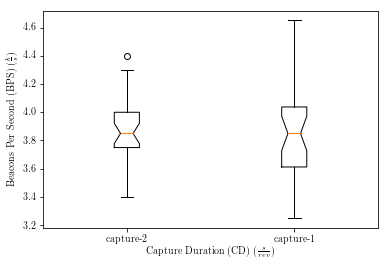

In [89]:
dataframes = []    
directory = '../../valid/capture/capture2/'

# Walk through each subdirectory of working directory
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith("-results.csv"):
            dataframes.append(pd.read_csv(os.path.join(root,file),sep=','))

df = pd.concat(dataframes, axis=0)

data =(df[df['hop-rate']!=0].groupby(['test', 'pass'])['hop-rate'].count()/df[df['hop-rate']!=0].groupby(['test', 'pass'])['duration'].max()).unstack()

fig = plt.figure()
ax = plt.subplot(111)

labels = pd.unique(df.test)

ax.boxplot(data, 1, labels=labels)
plt.xlabel(r'Capture Duration (CD) ($\frac{s}{rev}$)')
plt.ylabel(r'Beacons Per Second (BPS) ($\frac{b}{s}$)')
# fig.savefig('rr1a.pgf')